## Running classifiers from pre set features and problems

In [20]:
from matplotlib import pyplot as plt
import sys
from pathlib import Path

from tensorboard.notebook import display

PROJECT_ROOT = Path().resolve().parents[0]
sys.path.append(str(PROJECT_ROOT))
from src.run_models import run_logreg_subjects
from src.events_to_annot import get_valid_subject_ids_multistudy
import pandas as pd
import seaborn as sns
import numpy as np
from bids import BIDSLayout
from sklearn.metrics import ConfusionMatrixDisplay, pair_confusion_matrix
pd.option_context('display.max_rows', None, 'display.max_columns', None)

Example get valid patients method

In [4]:
chbmit = '/Volumes/Extreme SSD/EEG_Databases/BIDS_CHB-MIT'
siena = '/Volumes/Extreme SSD/EEG_Databases/BIDS_Siena'
layout = BIDSLayout(chbmit,validate=False)
valid_patids = get_valid_subject_ids_multistudy([chbmit,siena],min_n_sz=5)

In [29]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 1000)
display(pd.DataFrame([valid_patids]))

,/Volumes/Extreme SSD/EEG_Databases/BIDS_CHB-MIT,/Volumes/Extreme SSD/EEG_Databases/BIDS_Siena
0,"[01, 03, 05, 06, 08, 10, 12, 13, 14, 15, 16, 18, 20, 23, 24]","[00, 06, 10]"


Run detection using subject 10 form the siena database

In [6]:
results = pd.DataFrame([run_logreg_subjects("10",siena)])

X.shape (13481, 1121)
X NaNs: True
X has NaN, 0.0011050673558404894 percentage xnans found
replace nan values with 0.5 for now
6
(13481,)
train test split
seizure_starts=[ 1509  3591  5268  6987  7622  8469  9406 11039 11581 13074]
X_train NaNs: False
X_test NaNs: False
X_test dtype: float32
[detection] Training data shape: (5275, 1121), Test data shape: (8206, 1121)
Training data nans??: False
Test data nans??: False


In [21]:
results

,subject,mode,classifier,confusion_matrix,predictions,accuracy,f1,precision,recall,specificity,fpr_hour,PR-AUC,AUC
0,05,prediction,"LogisticRegression(class_weight='balanced', ma...","[[97, 12], [208, 33]]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.371429,0.230769,0.733333,0.136929,0.889908,24.685714,0.694217,0.513419
1,05,prediction,"LogisticRegression(class_weight='balanced', ma...","[[35, 14], [154, 147]]","[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...",0.520000,0.636364,0.913043,0.488372,0.714286,28.800000,0.917775,0.601329


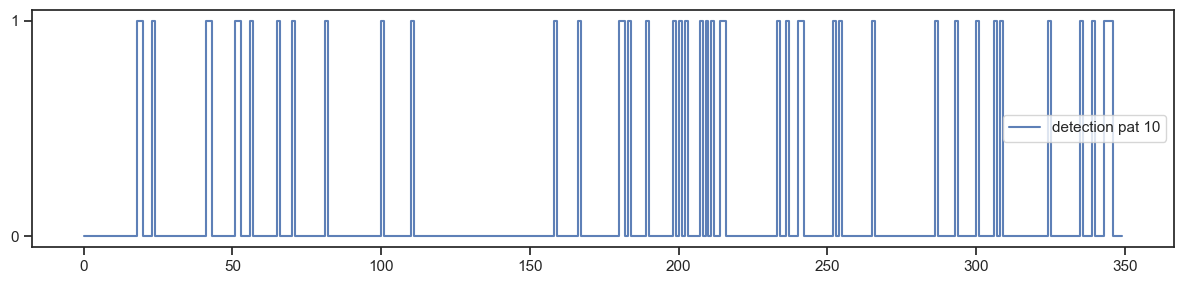

In [16]:
sns.set(style="ticks")

plt.figure(figsize=(12, 3))
sns.lineplot(results.predictions.values[0], alpha=0.9, label="detection pat 10", drawstyle="steps-post")

plt.yticks([0, 1])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
layout = BIDSLayout(siena,validate=False)
layout.get(subject="10")

checking NA features in patients 10 and 14 in siena

In [13]:
features_pat10 = np.load("/Volumes/Extreme SSD/EEG_Databases/BIDS_Siena/derivatives/linear_features/sub-10/eeg/sub-10_ses-01_task-szMonitoring_run-03_eeg_linear-features.npz")

In [11]:
np.isnan(features_pat10["X"]).any()

True

In [12]:
np.isnan(features_pat10["X"]).mean() * 100

0.0008705528830151034

In [62]:
sub14_X = np.load("/Volumes/Extreme SSD/EEG_Databases/BIDS_Siena/derivatives/linear_features/sub-14/eeg/sub-14_ses-01_task-szMonitoring_run-03_eeg_linear-features.npz")

In [63]:
np.isnan(sub14_X["X"]).any()

True

In [65]:
np.isnan(sub14_X["X"]).mean() * 100
np.where(np.isnan(sub14_X["X"]))[0][:10]

array([803, 804])

In [14]:
results = pd.DataFrame([run_logreg_subjects("05",chbmit,mode="prediction",SOP = sop, nseizures_train=3) for sop in ["20","25"]])

X.shape (28082, 1062)
X NaNs: False
(28082,)
(28082, 1062)
(28082,)
--- Apply valid mask (for prediction) ---
X dtype: float32
Is masked: False
train test split
seizure_starts=[201 572 922]
X_train NaNs: False
X_test NaNs: False
X_test dtype: float32
[prediction] Training data shape: (813, 1062), Test data shape: (350, 1062)
Training data nans??: False
Test data nans??: False
X.shape (28082, 1062)
X NaNs: False
(28082,)
(28082, 1062)
(28082,)
--- Apply valid mask (for prediction) ---
X dtype: float32
Is masked: False
train test split
seizure_starts=[141 512 862]
X_train NaNs: False
X_test NaNs: False
X_test dtype: float32
[prediction] Training data shape: (813, 1062), Test data shape: (350, 1062)
Training data nans??: False
Test data nans??: False


In [15]:
results

,subject,mode,classifier,confusion_matrix,predictions,accuracy,f1,precision,recall,specificity,fpr_hour,PR-AUC,AUC
0,05,prediction,"LogisticRegression(class_weight='balanced', ma...","[[97, 12], [208, 33]]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.371429,0.230769,0.733333,0.136929,0.889908,24.685714,0.694217,0.513419
1,05,prediction,"LogisticRegression(class_weight='balanced', ma...","[[35, 14], [154, 147]]","[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...",0.520000,0.636364,0.913043,0.488372,0.714286,28.800000,0.917775,0.601329


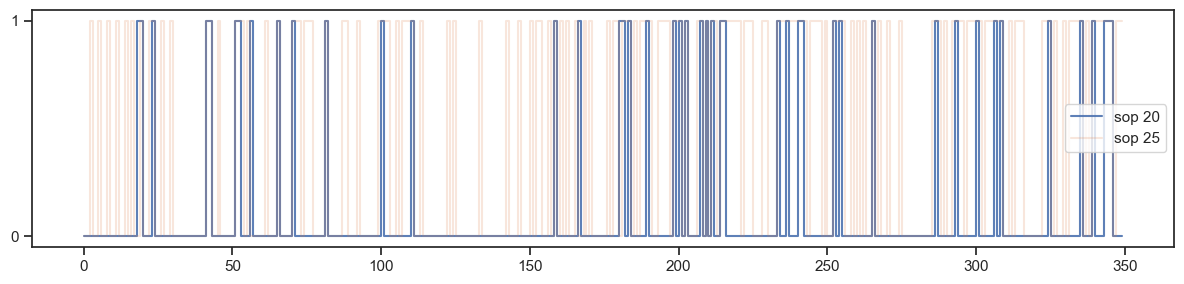

In [148]:
sns.set(style="ticks")

plt.figure(figsize=(12, 3))
sns.lineplot(results.predictions.values[0], alpha=0.9, label="sop 20", drawstyle="steps-post")
sns.lineplot(results.predictions.values[1], alpha=0.2, label="sop 25", drawstyle="steps-post")

plt.yticks([0, 1])
plt.legend()
plt.tight_layout()
plt.show()

Subject 04 data is problematic and trows an indexing

In [11]:
subject = "12"
event_files = layout.get(
    subject=subject,
     suffix="events",
    extension="tsv",
    return_type="filename"
)
events = [pd.read_csv(f, sep="\t") for f in event_files]
all_events = pd.concat(events, ignore_index=True)
all_events[all_events["eventType"]=="sz"] # the last two seizures are too close together

,onset,duration,eventType,confidence,channels,dateTime,recordingDuration
0,1665.0,61.0,sz,NaN,NaN,2051-01-27 22:44:34,3606.0
1,3415.0,32.0,sz,NaN,NaN,2051-01-27 22:44:34,3606.0
2,1426.0,13.0,sz,NaN,NaN,2051-01-28 00:46:38,3600.0
3,1591.0,23.0,sz,NaN,NaN,2051-01-28 00:46:38,3600.0
4,1957.0,20.0,sz,NaN,NaN,2051-01-28 00:46:38,3600.0
5,2798.0,26.0,sz,NaN,NaN,2051-01-28 00:46:38,3600.0
6,3082.0,32.0,sz,NaN,NaN,2051-01-28 01:46:45,3612.0
7,3503.0,32.0,sz,NaN,NaN,2051-01-28 01:46:45,3612.0
8,593.0,32.0,sz,NaN,NaN,2051-01-28 02:47:45,3611.0
9,811.0,45.0,sz,NaN,NaN,2051-01-28 02:47:45,3611.0


In [24]:
results = pd.DataFrame([run_logreg_subjects( "14",chbmit,mode="detection")])


[PosixPath('/Volumes/Extreme SSD/EEG_Databases/BIDS_CHB-MIT/derivatives/linear_features/sub-14/eeg/sub-14_ses-01_task-szMonitoring_run-00_eeg_linear-features.npz'), PosixPath('/Volumes/Extreme SSD/EEG_Databases/BIDS_CHB-MIT/derivatives/linear_features/sub-14/eeg/sub-14_ses-01_task-szMonitoring_run-01_eeg_linear-features.npz'), PosixPath('/Volumes/Extreme SSD/EEG_Databases/BIDS_CHB-MIT/derivatives/linear_features/sub-14/eeg/sub-14_ses-01_task-szMonitoring_run-02_eeg_linear-features.npz'), PosixPath('/Volumes/Extreme SSD/EEG_Databases/BIDS_CHB-MIT/derivatives/linear_features/sub-14/eeg/sub-14_ses-01_task-szMonitoring_run-03_eeg_linear-features.npz'), PosixPath('/Volumes/Extreme SSD/EEG_Databases/BIDS_CHB-MIT/derivatives/linear_features/sub-14/eeg/sub-14_ses-01_task-szMonitoring_run-04_eeg_linear-features.npz'), PosixPath('/Volumes/Extreme SSD/EEG_Databases/BIDS_CHB-MIT/derivatives/linear_features/sub-14/eeg/sub-14_ses-01_task-szMonitoring_run-05_eeg_linear-features.npz'), PosixPath('/Vol

In [ ]:
all_events = pd.concat(events, ignore_index=True)

valid_patids[chbmit]


In [25]:
results

,subject,mode,classifier,confusion_matrix,predictions,accuracy,f1,precision,recall,specificity,fpr_hour,PR-AUC,AUC
0,14,detection,"LogisticRegression(class_weight='balanced', ma...","[[2846, 1163], [9913, 2359]]","[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, ...",0.319698,0.298721,0.66979,0.192226,0.709903,51.43173,0.707226,0.451064


In [ ]:
cfm = results.confusion_matrix.values[0]
ConfusionMatrixDisplay(confusion_matrix=cfm).plot()